In [1]:
import ee
import eemont  # noqa: F401
import geemap
import geemap.colormaps as cm
from ipygee import chart
from bisonlab.data import s2_sr_harmonized
# import pandas as pd

In [2]:
# ee.Authenticate()
ee.Initialize()

In [3]:
buffalo_expansion = ee.FeatureCollection(
    "projects/colinhill/assets/bison-lab/Buffalo_Expansion_polygons"
)

In [45]:
parcels = buffalo_expansion.filter(
    ee.Filter.inList(
        "Name",
        [
            "Shoshone Tribe",
            "Hellyer Tribal Lease",
        ],
    )
)

parcel = buffalo_expansion.filter(ee.Filter.eq("Name", "Shoshone Tribe"))

In [41]:
buffalo_expansion.filter(ee.Filter.eq("Name", "Shoshone Tribe")).geometry().centroid().getInfo()

{'type': 'Point', 'coordinates': [-108.79519868020131, 43.20280898430678]}

In [53]:
start_date = "2016-07-01"
end_date = "2018-12-01"

In [6]:
s2 = s2_sr_harmonized(parcels, start_date, end_date).spectralIndices(["NDVI", "EVI"])

In [54]:
s2 = (
    ee.ImageCollection("COPERNICUS/S2")
    .filterBounds(parcels)
    .filterDate(start_date, end_date)
    .maskClouds(method='qa')
    .scaleAndOffset()
).tasseledCap()

In [55]:
rgbUnscaled = {'min':0, 'max':3000, 'bands':['B4','B3','B2']}
rgbScaled = {'min':0, 'max':0.3, 'bands':['B4','B3','B2']}

In [85]:
m = geemap.Map()
# m.addLayer(s2.first(), rgbScaled, "s2")
# m.addLayer(s2.select('TCW').first(), {'min':-1, 'max':0, 'bands':'TCW'}, "")
# m.addLayer(s2.select('TCB').first(), {'min':0, 'max':1, 'bands':'TCB'}, "")
# m.addLayer(s2.select('TCG').first(), {'min':-0.5, 'max':1, 'bands':'TCG'}, "")
m.addLayer(s2.select('TCG').first(), {"min": -1, "max": 1, "palette": cm.palettes.ndvi}, "")
m.centerObject(parcels, 12)
m

Map(center=[43.20224844499325, -108.80004390509521], controls=(WidgetControl(options=['position', 'transparent…

In [18]:
# point = buffalo_expansion.filter(ee.Filter.inList('Name', ["Shoshone Tribe"])).first().geometry().centroid()

points = ee.FeatureCollection([
    buffalo_expansion.filter(ee.Filter.inList('Name', ["Shoshone Tribe"])).first().geometry().centroid(),
    buffalo_expansion.filter(ee.Filter.inList('Name', ["Hellyer Tribal Lease"])).first().geometry().centroid()
])

In [11]:
chart_ts = chart.Image.series(**{
    'imageCollection': s2,
    'reducer': 'mean',
    'region': parcels,
    'scale': 10,
    'bands': ['NDVI', 'EVI'],
})

KeyError: 'system:time_start'

In [30]:
chart_ts.dataframe

,NDVI,EVI
2020-01-03 18:22:10.654,0.014973,-0.169347
2020-01-10 18:12:14.002,0.079375,0.034604
2020-01-13 18:22:07.989,0.087330,0.046717
2020-01-15 18:12:13.778,0.087676,0.049477
2020-01-18 18:22:09.961,-0.026414,-0.031884
...,...,...
2020-11-08 18:22:20.447,0.260645,0.155258
2020-11-13 18:22:17.041,0.245108,0.147123
2020-11-15 18:12:22.968,0.219952,0.138034
2020-11-23 18:22:16.453,0.237796,0.106583


<AxesSubplot: >

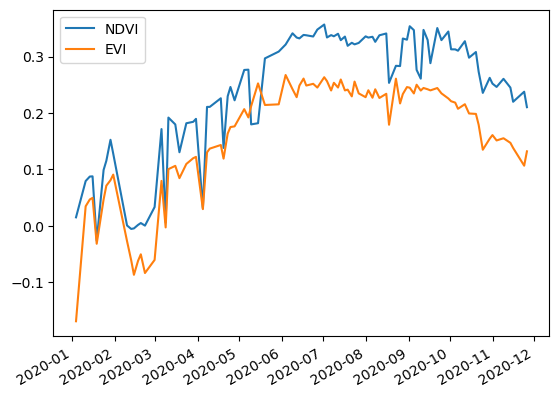

In [31]:
chart_ts.dataframe.plot()

In [ ]:
df = geemap.ee_to_df(stats)